# Gathering Data

In [53]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
import warnings 
warnings.filterwarnings('ignore')
df = pd.read_csv('yield_df.csv')
df.shape

(20847, 8)

In [54]:
df = pd.read_csv('yield_df.csv')
df.drop("Unnamed: 0", axis =1 , inplace = True)
df.head() # first 5 rows of the dataset

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Andaman & Nicobar Islands,Cassava,1990,31400,1996,12004.33,19.64
1,Andaman & Nicobar Islands,Maize,1990,20052,1996,12004.33,19.64
2,Andaman & Nicobar Islands,Plantains and others,1990,394286,1996,12004.33,19.64
3,Andaman & Nicobar Islands,Potatoes,1990,210685,1996,12004.33,19.64
4,Andaman & Nicobar Islands,"Rice, paddy",1990,31111,1996,12004.33,19.64


In [55]:
df.describe() 

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,20847.000000,20847.000000,20847.000000,20847.000000,20847.000000
mean,2001.472970,79402.027102,1174.055835,48077.171702,20.980473
std,7.060078,86530.686797,707.913760,65751.304038,5.904574
min,1990.000000,866.000000,51.000000,0.920000,1.610000
25%,1995.000000,20728.000000,591.000000,8674.580000,17.330000
50%,2001.000000,38260.000000,1083.000000,34468.930000,22.120000
75%,2008.000000,107692.000000,1738.000000,58349.440000,25.960000
max,2013.000000,457565.000000,3240.000000,367778.000000,29.410000


In [56]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

# Data Exploration

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


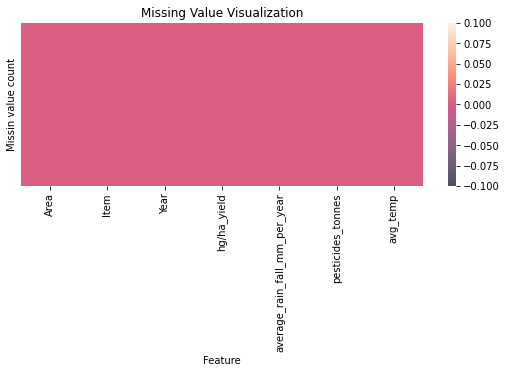

In [57]:
print(df.isnull().sum())
sns.heatmap(df.isnull(), yticklabels=False, alpha = 0.7)
plt.title("Missing Value Visualization")
plt.xlabel("Feature")
plt.ylabel("Missin value count")
plt.show()

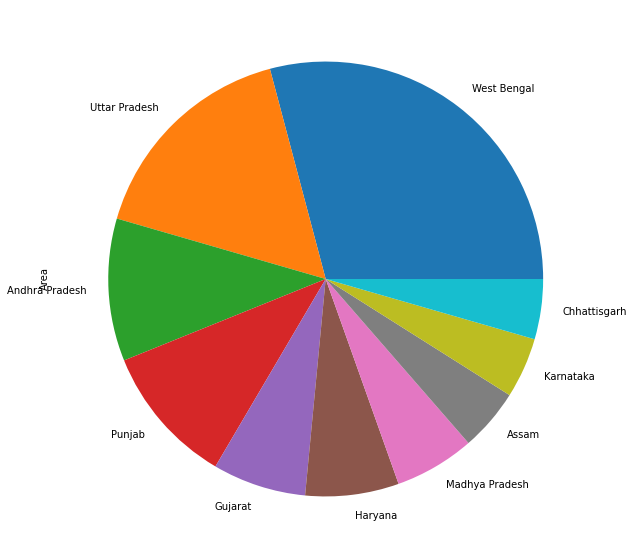

In [58]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
df['Area'].value_counts()[:10].plot(kind='pie')
plt.show()

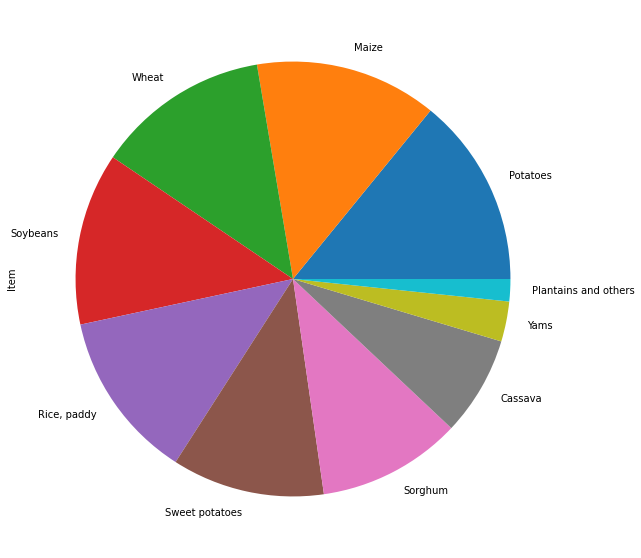

In [59]:
plt.rcParams["figure.figsize"] = (10,10)
df['Item'].value_counts()[:10].plot(kind='pie')
plt.show()

In [60]:
categorical_features = [feature for feature in df.columns if feature != 'Name' and df[feature].dtype == 'O']
numerical_features = [feature for feature in df.columns if feature != 'Name' and feature not in categorical_features]
print("Numerical Features: ",numerical_features)
print("Categorical Features: ", categorical_features)

Numerical Features:  ['Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
Categorical Features:  ['Area', 'Item']


In [61]:
df.groupby('Item').count()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,1541,1541,1541,1541,1541,1541
Maize,2825,2825,2825,2825,2825,2825
Plantains and others,345,345,345,345,345,345
Potatoes,2940,2940,2940,2940,2940,2940
"Rice, paddy",2618,2618,2618,2618,2618,2618
Sorghum,2231,2231,2231,2231,2231,2231
Soybeans,2673,2673,2673,2673,2673,2673
Sweet potatoes,2366,2366,2366,2366,2366,2366
Wheat,2687,2687,2687,2687,2687,2687


In [62]:
df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Area
West Bengal        327420324
Uttar Pradesh      167550306
Andhra Pradesh     130788528
Haryana            124470912
Gujarat            109111062
Punjab              73897434
Madhya Pradesh      69193506
Jammu & Kashmir     55419990
Karnataka           52263950
Tamil Nadu          46773540
Name: hg/ha_yield, dtype: int64

In [63]:
df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area           
Cassava         West Bengal        142810624
Potatoes        West Bengal         92122514
                Uttar Pradesh       49602168
                Jammu & Kashmir     46705145
                Gujarat             45670386
Sweet potatoes  West Bengal         44439538
Potatoes        Haryana             42918726
                Andhra Pradesh      42053880
Sweet potatoes  Andhra Pradesh      35808592
                Gujarat             35550294
Name: hg/ha_yield, dtype: int64

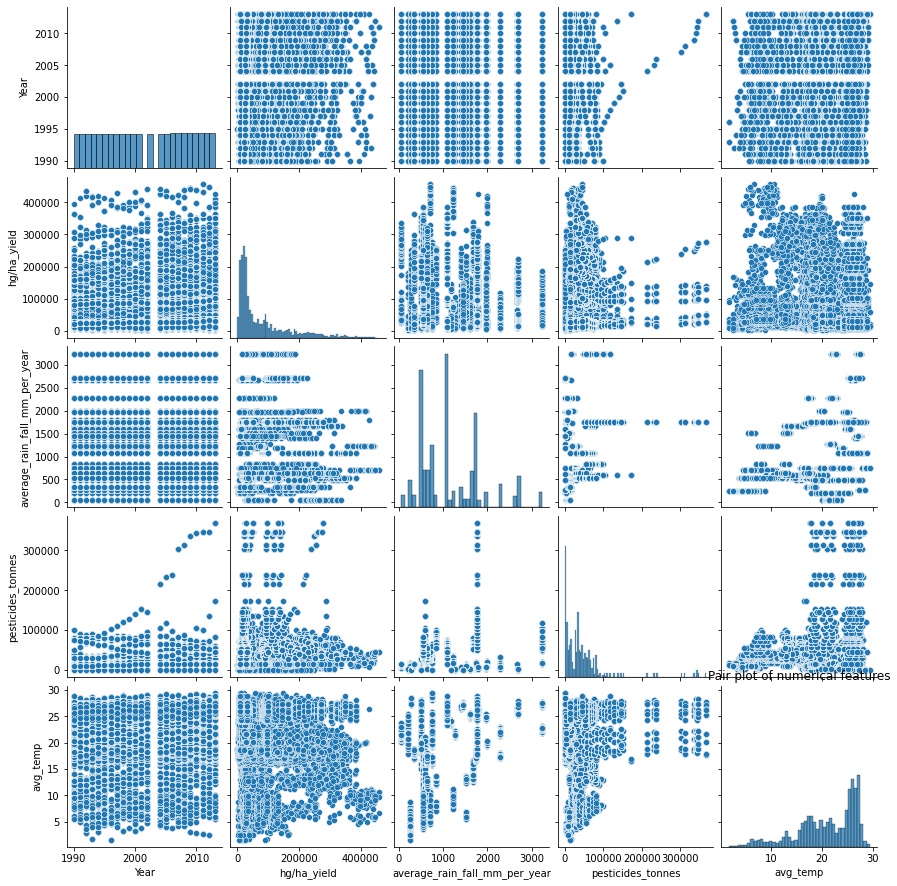

In [64]:
sns.pairplot(df[numerical_features])
plt.title("Pair plot of numerical features")
plt.show()

In [65]:
print("Correlation Matrix:\n ")
df.corr()

Correlation Matrix:
 


,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,0.091020,-0.001776,0.177390,0.021680
hg/ha_yield,0.091020,1.000000,-0.023346,0.054912,-0.116754
average_rain_fall_mm_per_year,-0.001776,-0.023346,1.000000,0.199511,0.306112
pesticides_tonnes,0.177390,0.054912,0.199511,1.000000,0.009919
avg_temp,0.021680,-0.116754,0.306112,0.009919,1.000000


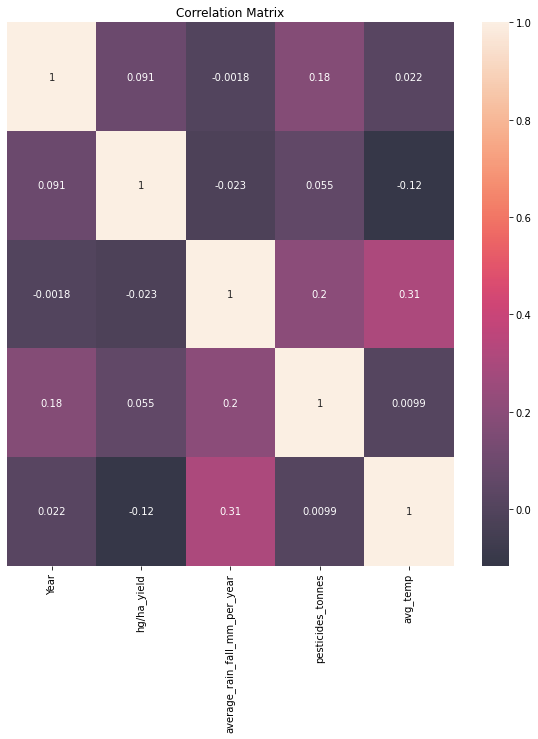

In [66]:
sns.heatmap(df.corr(),annot=True, yticklabels=False,cmap = 'rocket', alpha = 0.8)
plt.title("Correlation Matrix")
plt.show()

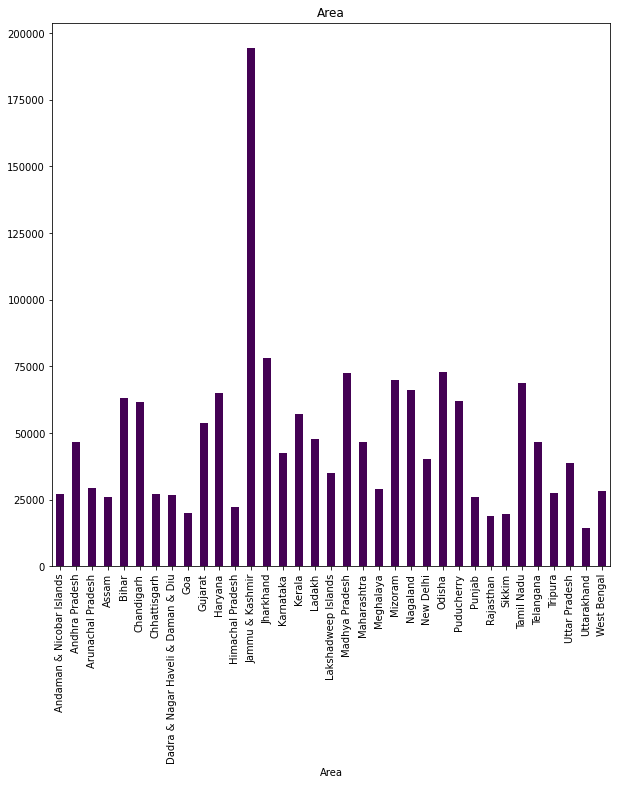

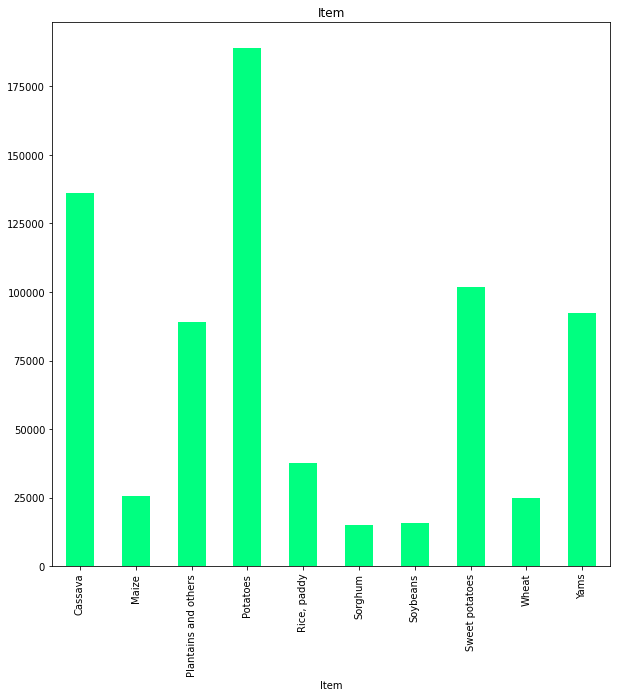

In [67]:
for i,feature in enumerate(categorical_features): 
    colors = ['viridis','winter_r','rocket','twilight']
    df.groupby(feature)['hg/ha_yield'].median().plot.bar(cmap= colors[i])
    plt.title(feature)
    plt.show()
    

In [68]:
keys =[]
vals = []
for feature in numerical_features: 
    keys.append(feature)
    vals.append(df['hg/ha_yield'].corr(df[feature]))

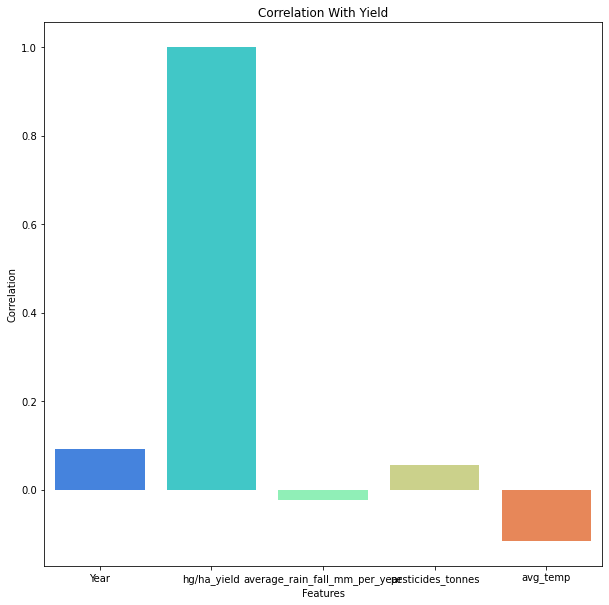

In [69]:
sns.barplot(keys,vals,palette='rainbow')
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.title("Correlation With Yield")
plt.rcParams['figure.figsize'] = [9,3]
plt.show()

# Data Preprocessing

In [70]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

### Outlier Detection and Removal

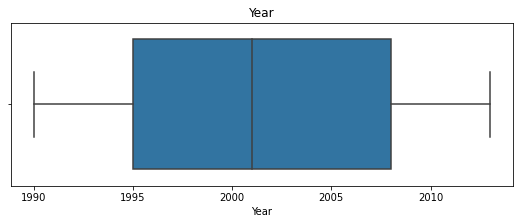

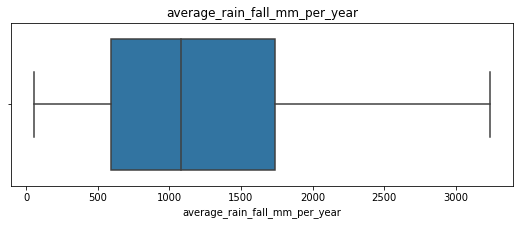

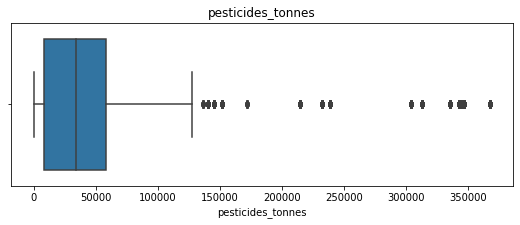

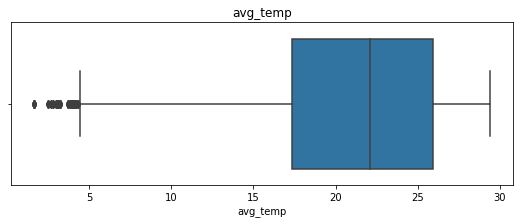

In [71]:
for feature in numerical_features:
    if feature != 'hg/ha_yield':
        sns.boxplot(df[feature])
        plt.title(feature)
        plt.show()

In [72]:
# Removing the outliers using Quantile Method. 
min_vals = []
max_vals= []
for feature in ['average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp']:
    min_vals.append(df[feature].quantile(0.05))
    max_vals.append(df[feature].quantile(0.95))
num_feat=['average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp']
for i,feature in enumerate(num_feat):
    df = df[(df[feature] <= max_vals[i]) & (df[feature] >= min_vals[i])]
df.shape

(16216, 7)

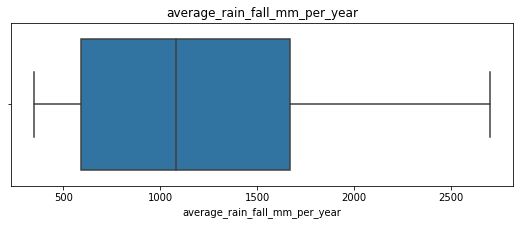

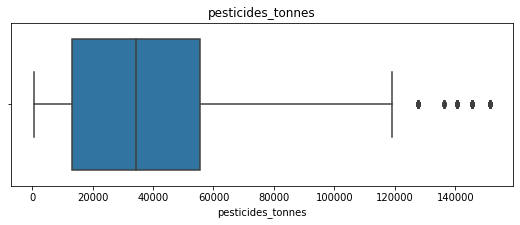

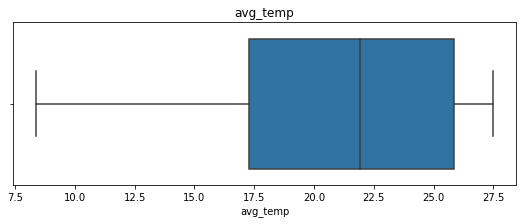

In [73]:
for feature in num_feat:
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.show()

### Feature Scaling and Encoding

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,5))
df[['average_rain_fall_mm_per_year','pesticides_tonnes']] = scaler.fit_transform(df[['average_rain_fall_mm_per_year','pesticides_tonnes']])
df.head()


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Andaman & Nicobar Islands,Cassava,1990,31400,3.501698,0.382409,597
1,Andaman & Nicobar Islands,Maize,1990,20052,3.501698,0.382409,597
2,Andaman & Nicobar Islands,Plantains and others,1990,394286,3.501698,0.382409,597
3,Andaman & Nicobar Islands,Potatoes,1990,210685,3.501698,0.382409,597
4,Andaman & Nicobar Islands,"Rice, paddy",1990,31111,3.501698,0.382409,597


In [37]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['avg_temp'] = encoder.fit_transform(df[['avg_temp']])
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Andaman & Nicobar Islands,Cassava,1990,31400,3.501698,0.382409,597
1,Andaman & Nicobar Islands,Maize,1990,20052,3.501698,0.382409,597
2,Andaman & Nicobar Islands,Plantains and others,1990,394286,3.501698,0.382409,597
3,Andaman & Nicobar Islands,Potatoes,1990,210685,3.501698,0.382409,597
4,Andaman & Nicobar Islands,"Rice, paddy",1990,31111,3.501698,0.382409,597
